In [3]:
try:
    %load_ext google.colab.data_table
except Exception as e:
    pass
import json

import pandas as pd
try:
    %matplotlib inline
except Exception as e:
    pass

import warnings
warnings.filterwarnings("ignore")

In [4]:
try:
    from google.colab import files
    uploaded = files.upload()
    data:dict = json.loads(uploaded['data-trunc2.json'])
except Exception as e:
    import util
    with open('./data-trunc2.json') as fp:
        # 500ms~
        # data:dict = util.partial_json(fp,objs=26)
        data:dict = json.load(fp)

In [5]:
data

{'1577836803078': {'assetA': {'ask': 7189, 'bid': 7188.89},
  'assetB': {'ask': 7170.25, 'bid': 7169.5}},
 '1577836806371': {'assetA': {'ask': 7190.09, 'bid': 7190.05},
  'assetB': {'ask': 7170.25, 'bid': 7169.5}},
 '1577836806459': {'assetA': {'ask': 7190.09, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836806474': {'assetA': {'ask': 7190.43, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836806575': {'assetA': {'ask': 7190.39, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807242': {'assetA': {'ask': 7190.33, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807344': {'assetA': {'ask': 7190.25, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807444': {'assetA': {'ask': 7190.21, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807545': {'assetA': {'ask': 7190.12, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807649': {'assetA': 

In [66]:
# df = pd.read_json('./data-trunc.json', orient='index')
df = pd.DataFrame.from_dict(data,orient='index')

,assetA,assetB
1577836803078,"{'ask': 7189, 'bid': 7188.89}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806371,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806459,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806474,"{'ask': 7190.43, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806575,"{'ask': 7190.39, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
...,...,...
1577837711136,"{'ask': 7178.32, 'bid': 7178.31}","{'ask': 7162.75, 'bid': 7159}"
1577837711173,"{'ask': 7178.32, 'bid': 7178.31}","{'ask': 7162.75, 'bid': 7162}"
1577837712988,"{'ask': 7178.32, 'bid': 7178.31}","{'ask': 7162.75, 'bid': 7161}"
1577837713474,"{'ask': 7178.32, 'bid': 7178.18}","{'ask': 7162.75, 'bid': 7161}"


In [7]:
def asks(state):
    ask_ = state['ask']
    return ask_
def bids(state):
    bid_ = state['bid']
    return bid_

In [27]:
assetA:pd.DataFrame = df.assetA.apply([asks, bids])

,asks,bids
1577836803078,7189.00,7188.89
1577836806371,7190.09,7190.05
1577836806459,7190.09,7190.05
1577836806474,7190.43,7190.05
1577836806575,7190.39,7190.05
...,...,...
1577837711136,7178.32,7178.31
1577837711173,7178.32,7178.31
1577837712988,7178.32,7178.31
1577837713474,7178.32,7178.18


In [10]:
print('assetA.asks.mean():',assetA.asks.mean())
print('assetA.bids.mean():',assetA.bids.mean())

assetA.asks.mean(): 7180.519816176471
assetA.bids.mean(): 7180.074784313725


In [11]:
assetB = df.assetB.apply([asks, bids])

,asks,bids
1577836803078,7170.25,7169.5
1577836806371,7170.25,7169.5
1577836806459,7170.50,7169.5
1577836806474,7170.50,7169.5
1577836806575,7170.50,7169.5
...,...,...
1577837711136,7162.75,7159.0
1577837711173,7162.75,7162.0
1577837712988,7162.75,7161.0
1577837713474,7162.75,7161.0


In [12]:
print('assetB.asks.mean():',assetB.asks.mean())
print('assetB.bids.mean():',assetB.bids.mean())

assetB.asks.mean(): 7161.867156862745
assetB.bids.mean(): 7160.515379901961


In [13]:
# short term exponential moving average
short_ema = assetA.ewm(span=12,adjust=False).mean()

,asks,bids
1577836803078,7189.000000,7188.890000
1577836806371,7189.167692,7189.068462
1577836806459,7189.309586,7189.219467
1577836806474,7189.481957,7189.347242
1577836806575,7189.621656,7189.455358
...,...,...
1577837711136,7178.268262,7178.217060
1577837711173,7178.276222,7178.231358
1577837712988,7178.282957,7178.243457
1577837713474,7178.288656,7178.233694


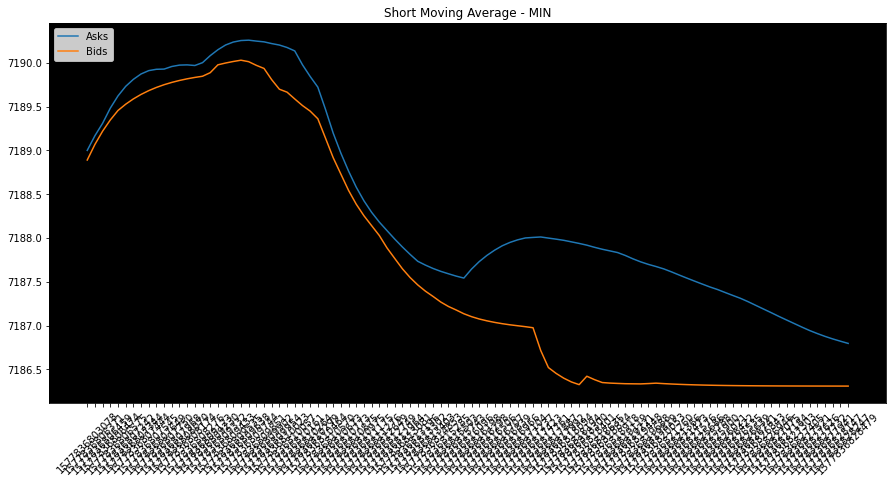

In [65]:
#plot(short_ema, 'Short Moving Average - MIN')
_short_ema_min = short_ema[:100]
util.plot(_short_ema_min, 'Short Moving Average - MIN')

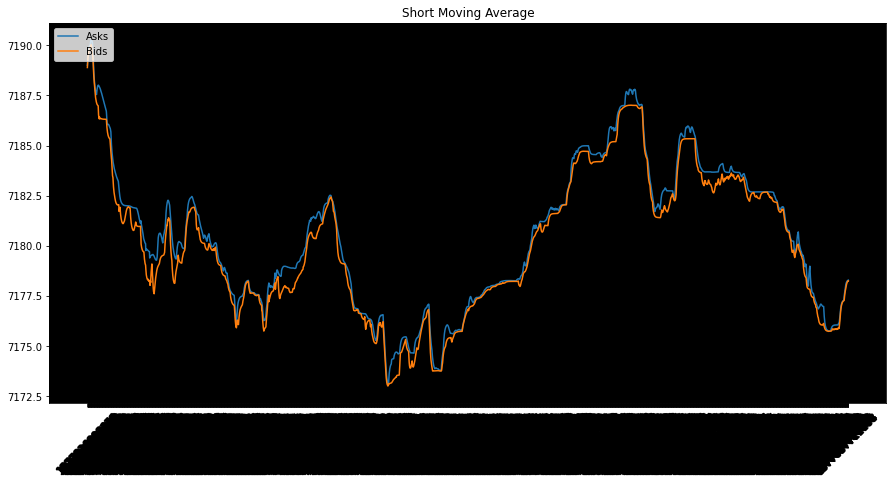

In [55]:
util.plot(short_ema, 'Short Moving Average')

In [56]:
# long term exponential moving average
long_ema = assetA.ewm(span=26,adjust=False).mean()

,asks,bids
1577836803078,7189.000000,7188.890000
1577836806371,7189.080741,7188.975926
1577836806459,7189.155501,7189.055487
1577836806474,7189.249908,7189.129155
1577836806575,7189.334359,7189.197365
...,...,...
1577837711136,7178.025934,7177.941848
1577837711173,7178.047717,7177.969118
1577837712988,7178.067886,7177.994369
1577837713474,7178.086561,7178.008119


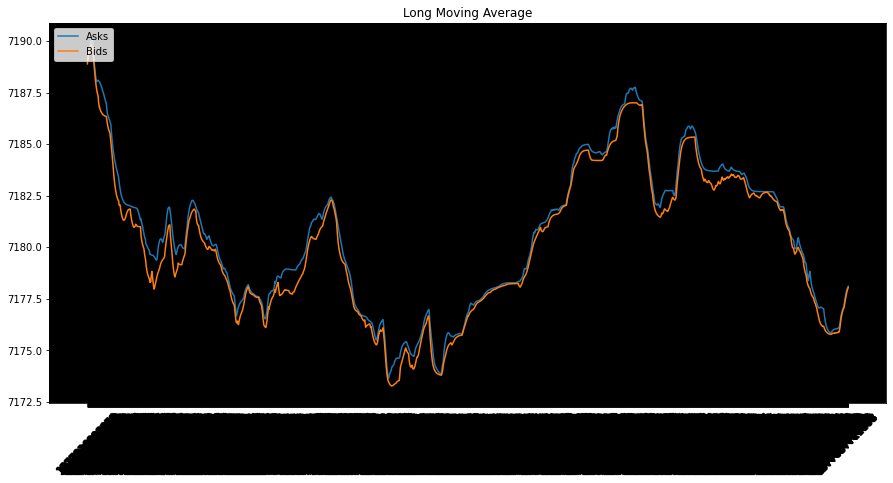

In [57]:
util.plot(long_ema,'Long Moving Average')

In [58]:
#Moving Average Convergence Divergence
macd = short_ema - long_ema

,asks,bids
1577836803078,0.000000,0.000000
1577836806371,0.086952,0.092536
1577836806459,0.154085,0.163980
1577836806474,0.232049,0.218087
1577836806575,0.287297,0.257993
...,...,...
1577837711136,0.242328,0.275212
1577837711173,0.228505,0.262240
1577837712988,0.215071,0.249088
1577837713474,0.202095,0.225575


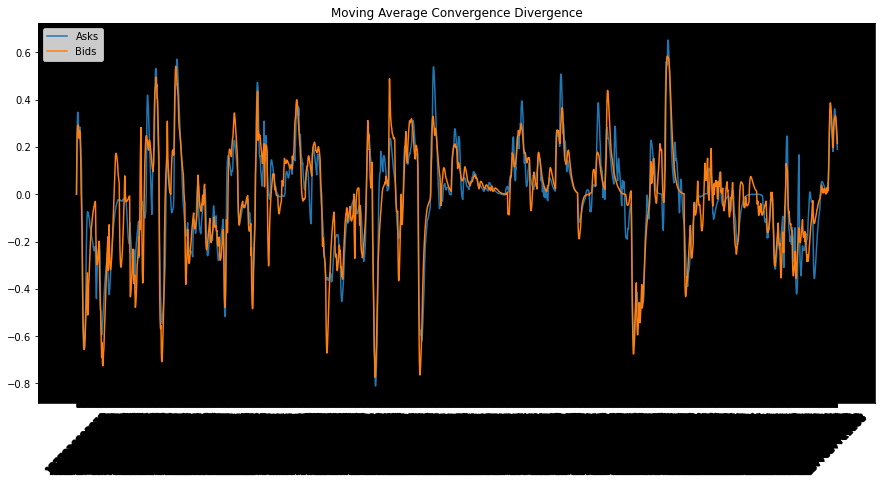

In [60]:
util.plot(macd, title = 'Moving Average Convergence Divergence')

In [59]:
# signal line
signal = macd.ewm(span=9, adjust=False).mean()

,asks,bids
1577836803078,0.000000,0.000000
1577836806371,0.017390,0.018507
1577836806459,0.044729,0.047602
1577836806474,0.082193,0.081699
1577836806575,0.123214,0.116958
...,...,...
1577837711136,0.285386,0.301545
1577837711173,0.274010,0.293684
1577837712988,0.262222,0.284765
1577837713474,0.250197,0.272927


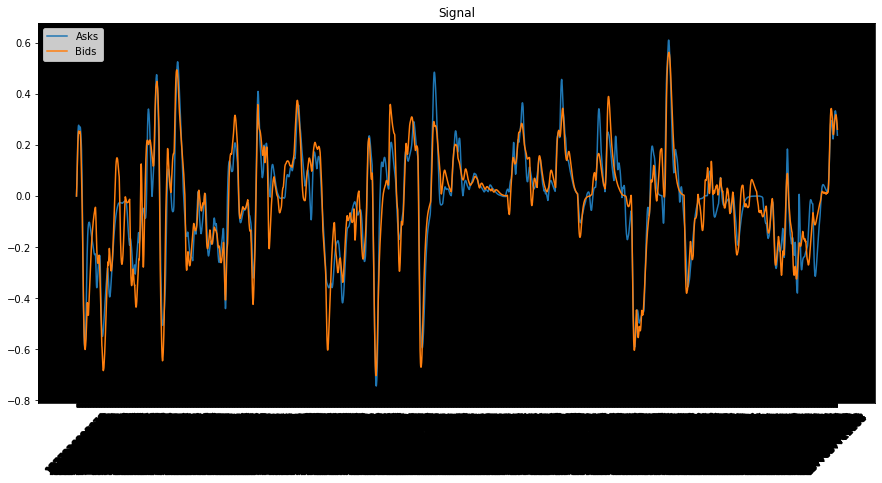

In [61]:
util.plot(signal, title = 'Signal')

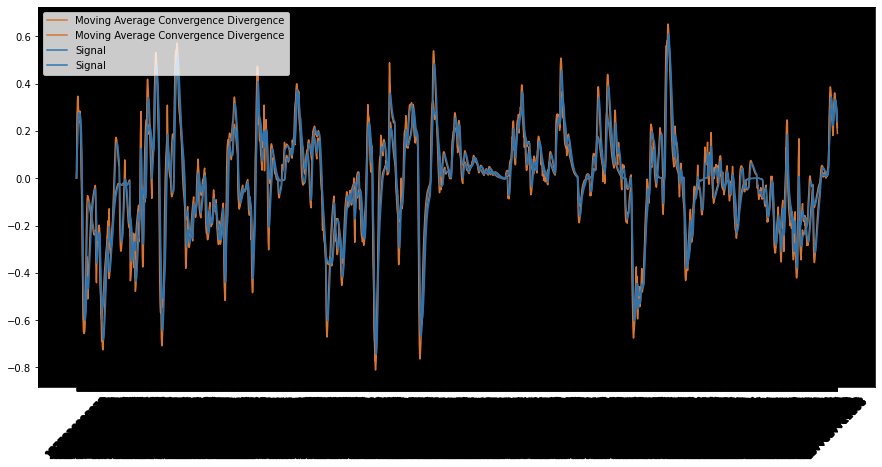

In [20]:
# plot
util.plotmany(df.index,[
    (macd, dict(label = 'Moving Average Convergence Divergence', color='#D87430')),
    (signal, dict(label = 'Signal',color='#2C75B1'))
    ])